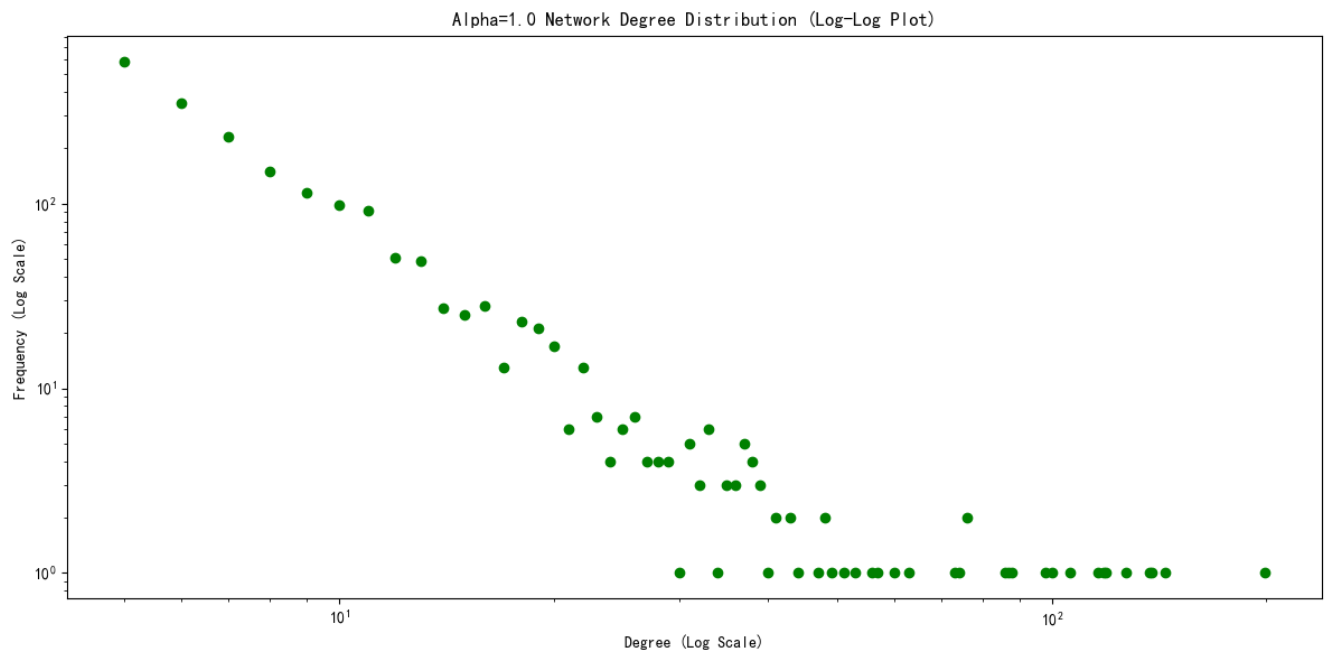

# 社会网络分析3

**主要内容**
- 无标度网络
- BA无标度网络

导入基本库，并设置一些必要的参数 <p>
本章节网络分析的主要包：networkx

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# 设置 matplotlib 的字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体，可根据系统情况更换
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

## 【一】无标度网络

**无标度网络**的度分布服从**幂律分布**，数学表达为 $ P(k) \sim k^{-\gamma} $（$ \gamma $ 为幂律指数，通常在 $ 2 $ 到 $ 3 $ 之间）。无标度网络能够较好地拟合现实中的网络。
<br> 
* **两极分化**：网络中大部分节点的连接度较低，仅有少数节点（称为“枢纽节点”或“集散节点”）拥有极高的连接度。在大型无标度网络中，最大度与最小度之间可能存在几个数量级的差异。
* **两级分化的原因**：对于度指数在2和3之间的无标度网络，当网络规模趋于无穷大，其度分布的一阶矩是有限的，但二阶矩及更高阶矩趋近于无穷大。故对于随机选择的一个节点，分析其度的可能取值是意义不大的，即可能很小，也可能很大。


**与随机网络相比**
* 无标度网络有大量度比较小的节点，大度节点存在的概率也比随机网络大。随机网络的度主要分布在平均度附近。
* 随机网络像高速公路，分布比较均匀；无标度网络像航空交通网络，存在枢纽节点。
* 无标度网络中节点的平均距离比随机网络更小；
* 它们间差异主要源自泊松分布与幂律分布的不同。

## 一、度分布与模型

### 1. 生成幂律分布

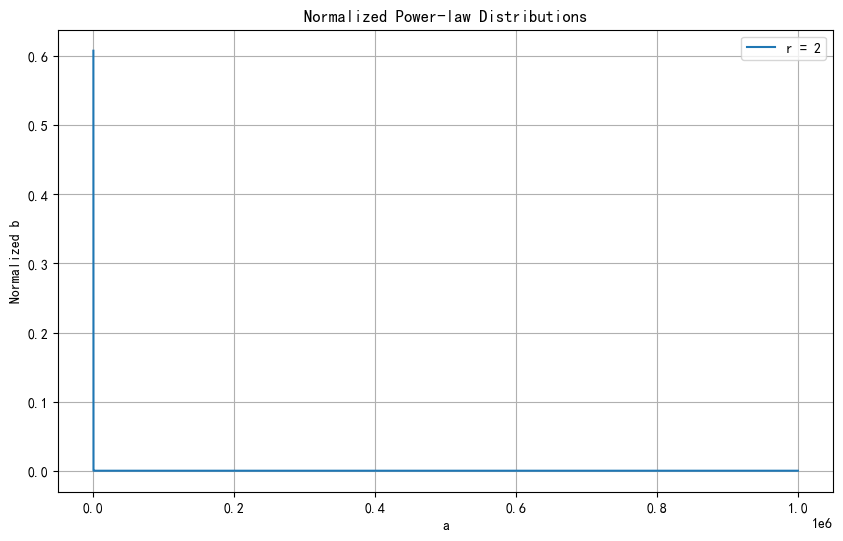

In [6]:
# ---------------------------------
#  选定你的指数序列
r_values = [2]
# ---------------------------------

# 生成序列 a
a = np.arange(1, 1000001, 1).astype(float)


plt.figure(figsize=(10, 6))

for r in r_values:
    # 对序列 a 求 -r 次方得到序列 b
    b = a ** (-r)
    # 对序列 b 进行归一化
    b_normalized = b / np.sum(b)
    
#     a = np.log(a)
#     b_normalized = np.log(b_normalized)
    
    # 绘制曲线
    plt.plot(a, b_normalized, label=f'r = {r}')

plt.title('Normalized Power-law Distributions')
plt.xlabel('a')
plt.ylabel('Normalized b')
plt.legend()
plt.grid(True)
plt.show()

随着度的增加，幂律分布趋近于0的速度相当快。前面所述隐含着一个结论：即泊松分布趋近于0的速度甚至更快。

### 2、现实网络与幂律分布的比较

* 我们采用幂律分布来拟合facebook社交网络,并绘制现实网络度分布与拟合分布的对数散点图

1


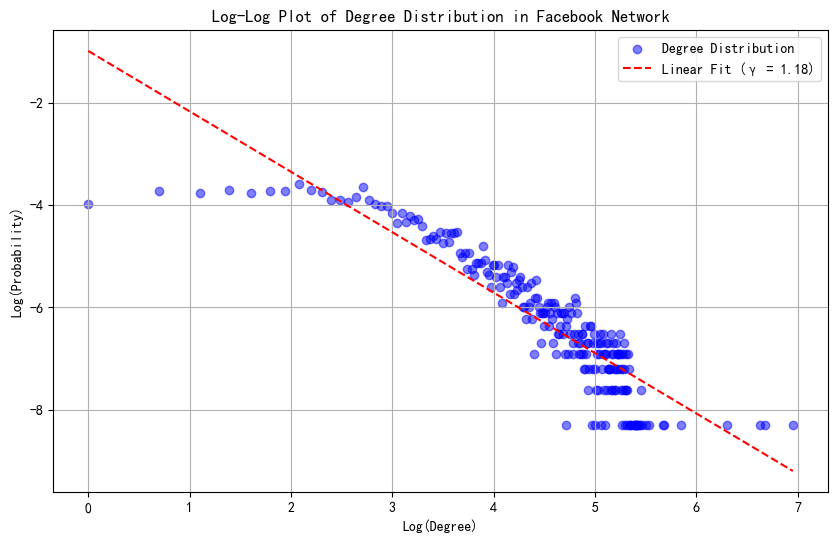

估计的度指数 γ: 1.18


In [27]:
from sklearn.linear_model import LinearRegression

# --------------------------------------------------------------------------------
# 选择你要分析的文件
file = r'E:\研究生学业\社会网络分析\社会网络分析可视化\facebook_combined.txt'
# --------------------------------------------------------------------------------


# 读取解压后的文件
edges = []
with open(file, 'r') as f:
    for line in f:
        u, v = line.strip().split()
        edges.append((int(u), int(v)))

# 构建网络
G = nx.Graph()
G.add_edges_from(edges)

# 估计度指数
def calculate_degree_distribution(G):
    degrees = [d for _, d in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    probabilities = counts / len(G.nodes())
    return unique_degrees, probabilities

unique_degrees, probabilities = calculate_degree_distribution(G)
# print(np.min(unique_degrees))

# 去除概率为 0 的点，避免对数运算错误
valid_indices = probabilities > 0
unique_degrees = unique_degrees[valid_indices]
probabilities = probabilities[valid_indices]

# 进行对数变换
unique_degree_log = np.log(unique_degrees).reshape(-1, 1)
probabilities_log = np.log(probabilities)

# 一元线性回归拟合
model = LinearRegression()
model.fit(unique_degree_log, probabilities_log)

# 提取斜率和截距
slope = model.coef_[0]
intercept = model.intercept_

# 计算估计的度指数
gamma = -slope

# 绘制对数 - 对数图
plt.figure(figsize=(10, 6))
plt.scatter(unique_degree_log, probabilities_log, label='Degree Distribution', color='blue', alpha=0.5)

# 绘制拟合直线
fit_x = np.linspace(min(unique_degree_log), max(unique_degree_log), 100)
fit_y = slope * fit_x + intercept
plt.plot(fit_x, fit_y, label=f'Linear Fit (γ = {gamma:.2f})', color='red', linestyle='--')

plt.title('Log-Log Plot of Degree Distribution in Facebook Network')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Probability)')
plt.legend()
plt.grid(True)
plt.show()

print(f"估计的度指数 γ: {gamma:.2f}")

- facebook社交网络的度指数在1到2之间
- 小度节点出现的概率低于幂律分布，大度节点出现的概率大于幂律分布
- 大部分节点出现在中间部分

我们可以借此看看随机网络的对数度分布

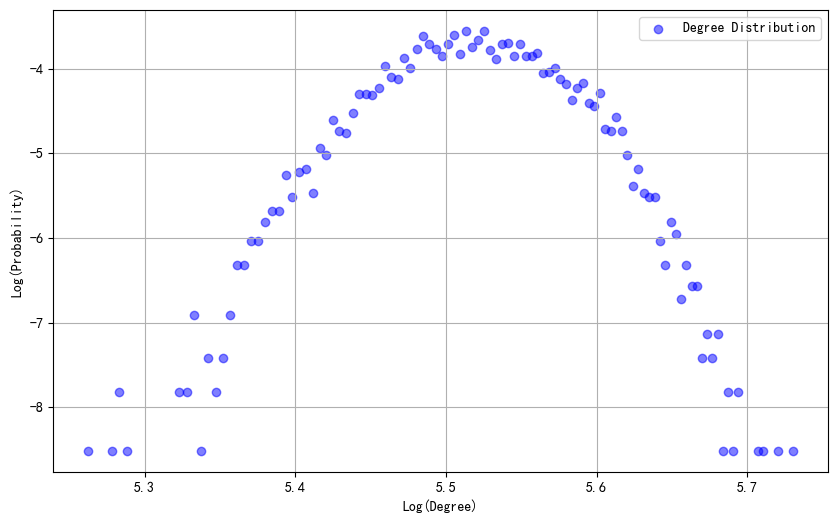

In [43]:
# -----------------------------------------------------------------------
# 调整你想生成的网络的参数
num_nodes= 5000
edge_probability = 0.05
# -----------------------------------------------------------------------

G = nx.erdos_renyi_graph(num_nodes, edge_probability)
    
def calculate_degree_distribution(G):
    degrees = [d for _, d in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    probabilities = counts / len(G.nodes())
    return unique_degrees, probabilities

unique_degrees, probabilities = calculate_degree_distribution(G)
# print(np.min(unique_degrees))

# 去除概率为 0 的点，避免对数运算错误
valid_indices = probabilities > 0
unique_degrees = unique_degrees[valid_indices]
probabilities = probabilities[valid_indices]

# 进行对数变换
unique_degree_log = np.log(unique_degrees).reshape(-1, 1)
probabilities_log = np.log(probabilities)

# 绘制对数 - 对数图
plt.figure(figsize=(10, 6))
plt.scatter(unique_degree_log, probabilities_log, label='Degree Distribution', color='blue', alpha=0.5)

plt.xlabel('Log(Degree)')
plt.ylabel('Log(Probability)')
plt.legend()
plt.grid(True)
plt.show()

### 3、生成符合幂律分布的度序列

**配置模型**

**先生成度序列，给每个节点配置度，基于度随机生成边**

配置模型（Configuration Model）是复杂网络领域中用于生成具有指定度序列网络的经典模型，广泛应用于网络结构分析、性质研究（如度分布、聚类系数、连通性等）。
配置模型的核心是**基于预设的度序列构建网络**。即已知每个节点的度（连接数），通过随机匹配边的方式生成网络。它不关注具体的实际网络场景，而是从抽象的度序列出发，为研究网络的普适性特征提供基础框架。

1. **确定度序列**  
   首先定义每个节点的度，形成度序列 $[k_1, k_2, \dots, k_n]$，其中 $k_i$ 表示节点 $i$ 的度。度序列可服从特定分布（如幂律分布、指数分布等）。例如，生成符合幂律分布的度序列，模拟无标度网络的节点连接特性。

2. **分配节点与边的“配置”**  
   为每个节点 $i$ 分配 $k_i$ 个“边端点”（也称为“桩”）。所有节点的边端点总数需为偶数（若为奇数，可微调度序列）。例如，节点 $A$ 度为 $3$，则分配 $3$ 个边端点。

3. **随机匹配边端点**  
   随机两两匹配边端点，形成边。例如，节点 $A$ 的一个边端点与节点 $B$ 的边端点匹配，即生成边 $(A, B)$。此过程完全随机，确保每个边端点有相同概率被匹配。

4. **处理无效边**  
   匹配后可能产生平行边（两节点间多条边）和自环（节点连向自身）。实际应用中，通常会过滤这些无效边：
   - 移除自环：删除节点与自身相连的边。
   - 去平行边：若两节点间有多条边，仅保留一条（或根据研究需求处理）.
---

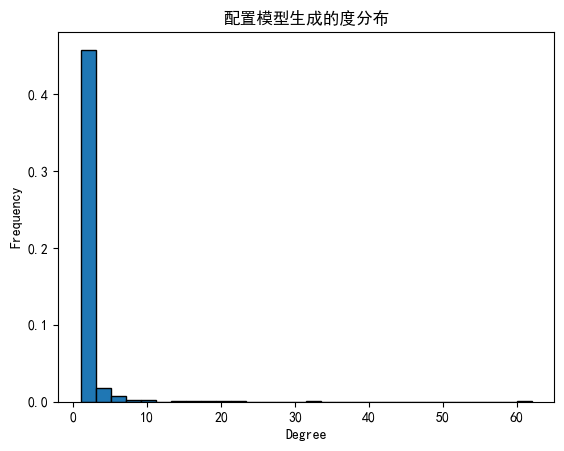

In [45]:
# --------------------------------------------------
# 生成幂律度序列
n = 1000  # 节点数
gamma = 2.5  # 幂律指数
# --------------------------------------------------

degrees = np.random.zipf(gamma, n)
degrees = degrees.astype(int)
degrees[degrees < 1] = 1  # 确保度≥1

# 检查度序列总和是否为奇数
if np.sum(degrees) % 2 != 0:
    # 找到一个度大于 0 的节点，将其度加 1
    index = np.where(degrees > 0)[0][0]
    degrees[index] += 1

# 配置模型生成网络
G = nx.configuration_model(degrees)
G = nx.Graph(G)  # 转换为无向图，去除平行边和自环
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph([(u, v) for u, v in G.edges() if u != v])

# 可视化度分布
import matplotlib.pyplot as plt
plt.hist(degrees, bins=30, density=True, edgecolor='black')
plt.title("配置模型生成的度分布")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

----
**隐参数模型**

**先给每个节点赋予隐藏属性，基于两个节点间的属性确定他们是否连边**


隐参数模型（Latent Parameter Model）是复杂网络研究中用于生成具有特定结构网络的重要方法，其核心思想是通过假设节点存在某种隐藏属性（即隐参数），并基于这些属性生成网络连接。
#### 1. 隐参数的定义
隐参数是节点的内在属性，无法直接观测，但决定了节点的连接行为。例如：
- 在社交网络中，隐参数可能代表用户的“社交活跃度”或“吸引力”。
- 在蛋白质相互作用网络中，隐参数可能反映蛋白质的功能重要性。

#### 2. 连接概率机制
节点 $i$ 和 $j$ 之间建立连接的概率 $p_{ij}$ 由它们的隐参数 $\theta_i$ 和 $\theta_j$ 共同决定。常见的概率模型包括：
- **乘积模型**：$p_{ij} = \frac{\theta_i \theta_j}{\sum_{k,l} \theta_k \theta_l}$（权重与隐参数乘积成正比）。
- **加法模型**：$p_{ij} = \frac{\theta_i + \theta_j}{\sum_{k,l} (\theta_k + \theta_l)}$（权重与隐参数之和成正比）。
- **指数模型**：$p_{ij} = \frac{\exp(\theta_i + \theta_j)}{\sum_{k,l} \exp(\theta_k + \theta_l)}$（增强高隐参数节点的连接概率）。
<br>
- **《巴拉巴西社会网络》中采用的模型**：
 $ p(\eta_i, \eta_j) = \frac{\eta_i \eta_j}{\langle \eta \rangle N} $

#### 3. 关键特性
1. **度分布可控性**  
   隐参数的分布直接影响网络的度分布。例如：
   - 若隐参数服从幂律分布，则节点度也服从幂律分布。
   - 若隐参数服从正态分布，则度分布接近泊松分布。

2. **灵活性与可解释性**  
   - **灵活性**：可通过调整隐参数的分布和连接概率函数，生成多种类型的网络（如无标度网络、小世界网络）。
   - **可解释性**：隐参数的物理意义明确（如社交吸引力），便于结合领域知识建模。

3. **计算复杂度**  
   - 生成隐参数和概率矩阵的时间复杂度为 \(O(n^2)\)，适用于中小规模网络。
   - 对于大规模网络，需优化算法（如抽样策略）。




#### 4. 与其他模型的对比
| **模型**         | **核心思想**                     | **优点**                     | **缺点**                     |
|------------------|----------------------------------|------------------------------|------------------------------|
| **隐参数模型**   | 基于隐藏属性生成连接概率         | 度分布灵活，可解释性强       | 计算复杂度较高               |
| **配置模型**     | 直接给定度序列，随机匹配边       | 度序列精确可控               | 忽略连接概率的局部结构       |
| **BA无标度模型** | 增长性 + 优先连接                | 度分布严格幂律               | 无法控制聚类系数等其他属性   |




[96 60 49 40 38 32 32 28 22 20 20 19 19 18 18 17 16 16 16 15 15 14 14 13
 13 12 12 12 12 12 11 10 10  9  9  9  9  9  9  9  9  8  8  8  8  8  8  8
  8  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

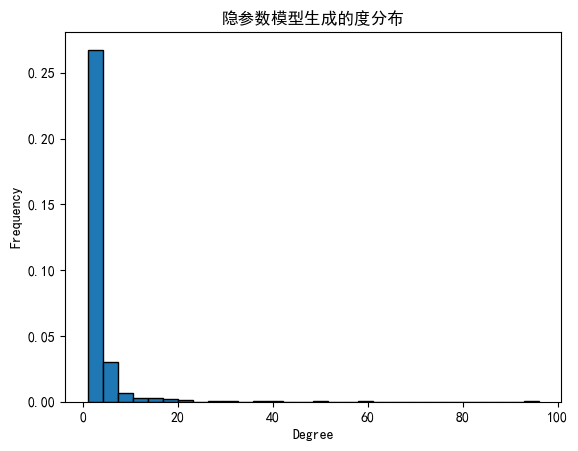

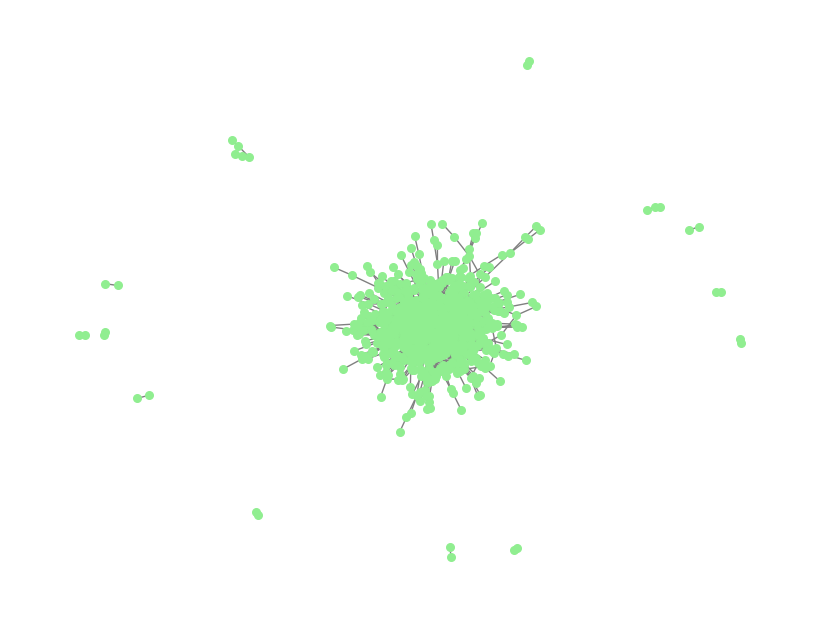

[3.136e+00 1.736e+00 1.736e+00 ... 1.000e-03 1.000e-03 1.000e-03]


In [55]:
def latent_parameter_model(n=10000, gamma=2.5):
    # 生成隐参数（幂律分布）
    theta = np.random.zipf(gamma, n)
    theta = theta.astype(float)

    # 计算连接概率矩阵（乘积模型）
    p_matrix = np.outer(theta, theta) / (n)

    # 对 p_matrix 进行倒序排列
    flattened_p_matrix = p_matrix.flatten()
    sorted_p_matrix = np.sort(flattened_p_matrix)[::-1]

    # 生成网络
    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.rand() < p_matrix[i, j]:
                G.add_edge(i, j)

    # 计算度分布
    degrees = [d for _, d in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
#     print(np.sort(degrees)[::-1])

    # 可视化度分布
    plt.hist(degrees, bins=30, density=True, edgecolor='black')
    plt.title("隐参数模型生成的度分布")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=False, node_color='lightgreen', node_size=30, edge_color='gray')
    plt.show()

    return sorted_p_matrix

# 调用示例
sorted_p = latent_parameter_model(n=1000, gamma=2.5)
print(sorted_p)

**度保持的随机化**

**保持度分布不变，进行随机边交换，比较随机前后的图**

度保持的网络随机化，指在网络重构时，保持每个节点的度（连接数量）不变，仅随机调整边的连接对象。生成的新网络与原始网络度分布一致，但边的连接模式被随机化，用于隔离度分布对网络特性的影响，研究边组织方式等其他结构因素的作用。
 
在复杂网络研究中，原始网络可能兼具多种特性（如无标度性、小世界特性）。研究某一结构（如聚类系数）对网络功能（如传播）的影响时，需排除度分布干扰。度保持随机化通过生成“对照网络”，帮助研究者区分网络特性是由度分布决定，还是由边的具体组织方式决定。

#### 实现原理与方法  
- **边交换操作（以双边缘交换为例）**：  
  1. **选边**：随机选取两条边，如\((u_1, v_1)\)和\((u_2, v_2)\)。  
  2. **检查**：验证交换后是否产生自环或平行边。  
  3. **交换**：若满足条件，生成新边\((u_1, v_2)\)和\((u_2, v_1)\)。  
  4. **重复**：按预设次数交换，生成度保持的随机网络。  
- **算法核心**：仅改变边的连接关系，确保随机化前后节点度不变，度分布严格一致。


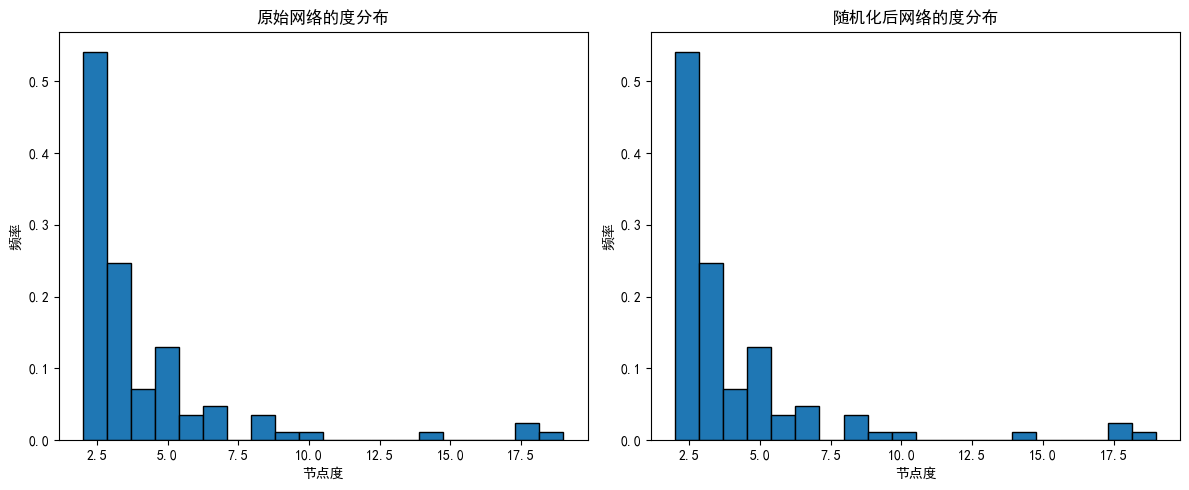

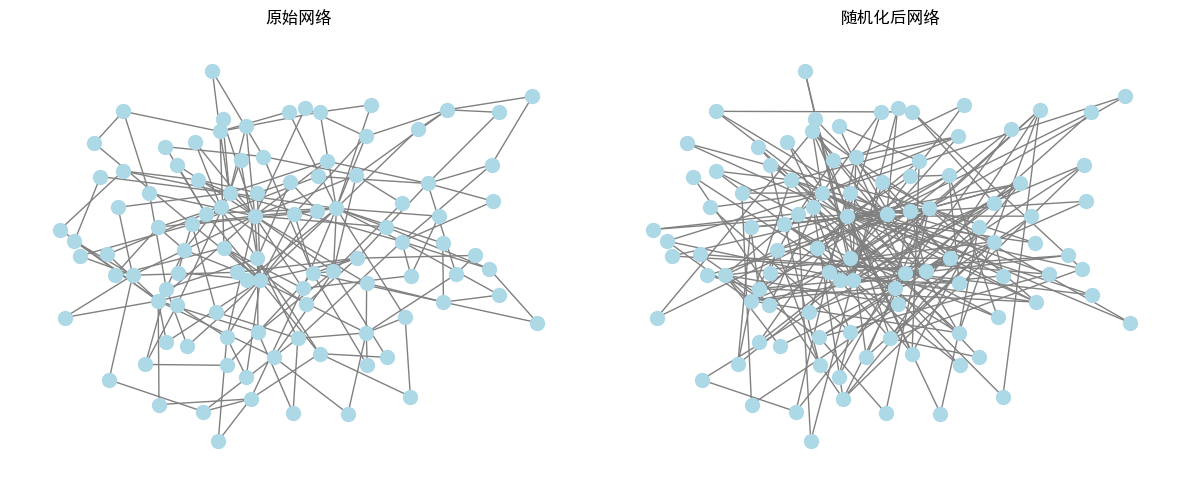

原始网络的平均集聚系数：0.09449832537603435
随机化后网络的平均集聚系数：0.025017165840695254


In [59]:
def degree_preserving_randomization(G, nswap=1000, max_attempts=10000):
    random_G = G.copy()
    swapped_count = 0
    edges = list(random_G.edges())

    while swapped_count < nswap and max_attempts > 0:
        idx1, idx2 = np.random.choice(len(edges), 2, replace=False)
        u1, v1 = edges[idx1]
        u2, v2 = edges[idx2]

        if (u1 != u2 and u1 != v2 and v1 != u2 and v1 != v2 and
                not random_G.has_edge(u1, v2) and not random_G.has_edge(u2, v1)):
            random_G.remove_edges_from([(u1, v1), (u2, v2)])
            random_G.add_edges_from([(u1, v2), (u2, v1)])
            swapped_count += 1
            edges = list(random_G.edges())

        max_attempts -= 1

    if swapped_count < nswap:
        print(f"警告：仅完成 {swapped_count} 次边交换，未达到指定的 {nswap} 次")

    return random_G


# 生成一个初始网络（例如，使用 BA 无标度网络）
original_G = nx.barabasi_albert_graph(100, 2)

# 进行度保持的随机化
randomized_G = degree_preserving_randomization(original_G, nswap=500, max_attempts=20000)

# 对比随机化前后的度分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
original_degrees = [d for _, d in original_G.degree()]
plt.hist(original_degrees, bins=20, density=True, edgecolor='black')
plt.title("原始网络的度分布")
plt.xlabel("节点度")
plt.ylabel("频率")

plt.subplot(1, 2, 2)
randomized_degrees = [d for _, d in randomized_G.degree()]
plt.hist(randomized_degrees, bins=20, density=True, edgecolor='black')
plt.title("随机化后网络的度分布")
plt.xlabel("节点度")
plt.ylabel("频率")

plt.tight_layout()
plt.show()

# 绘制随机化前后的图
plt.figure(figsize=(12, 5))

# 绘制原始网络
plt.subplot(1, 2, 1)
pos = nx.spring_layout(original_G)
nx.draw(original_G, pos, node_color='lightblue', node_size=100, edge_color='gray', with_labels=False)
plt.title("原始网络")

# 绘制随机化后的网络
plt.subplot(1, 2, 2)
nx.draw(randomized_G, pos, node_color='lightblue', node_size=100, edge_color='gray', with_labels=False)
plt.title("随机化后网络")

plt.tight_layout()
plt.show()

print(f"原始网络的平均集聚系数：{nx.average_clustering(original_G)}")
print(f"随机化后网络的平均集聚系数：{nx.average_clustering(randomized_G)}")

## 【二】BA无标度网络

BA无标度网络（Barabási - Albert无标度网络）是复杂网络研究中具有高影响力的一种模型，由艾伯特 - 拉斯洛·巴拉巴西（Albert - László Barabási）和雷卡·阿尔伯特（Réka Albert）于1999 年提出，用于描述具有幂律度分布特征的复杂网络。

- **构造算法**：基于网络的增长和优先连接两个特征构建：
    - **增长**：从一个具有$m_{0}$个节点的网络开始，每次引入一个新的节点，新节点会与$m$个已存在的节点相连，且需满足$m\leq m_{0}$ 。比如初始有一个包含5个节点的网络，每次新加入的节点可以连接到已有的2个节点上。
    - **优先连接**：一个新节点与已存在节点$v_{i}$相连接的概率$\prod _{i}$与节点$v_{i}$的度$k_{i}$成正比，即$\prod _{i} = \frac{k_{i}}{\sum_{j}^{}k_{j}}$。这意味着度越高的节点，越容易吸引新节点与其连接。经过$t$步后，会产生一个有$N = t + m_{0}$个节点，$mt$条边的网络。
- **特性**：
    - **度分布**：依据增长性和择优选择的原则，网络最终会演化为标度不变的状态，度值为$k$的节点的概率正比于幂次项$k^{-3}$ ，呈现出幂律分布。
    - **网络直径**：当$m > 1$并且网络节点数$N$较大时，网络直径为$\left \langle d \right \rangle \sim \frac{ln N}{ln ln N}$ ，其增长比$lnN$慢。相较于同等大小的随机网络，BA网络的直径更小，在$N$较大时这种差异更显著。
    - **集聚系数**：计算公式为$\left \langle C \right \rangle \sim \frac{(lnN)^{2}}{N}$ 。与随机网络中集聚系数对$1/N$的依赖关系不同，在$N$较大时，$(lnN)^{2}$这一项会使集聚系数显著增加，所以BA网络的集聚系数比随机网络更高。 
- **现实应用**：该模型能解释许多实际网络的结构特征，广泛应用于多个领域。如在互联网中，少数核心服务器作为枢纽节点，连接着大量普通节点；社交网络里，明星、大V等用户拥有众多粉丝连接，而普通用户连接较少；在生物学中，蛋白质相互作用网络也符合BA无标度网络的特征，少数关键蛋白质与大量其他蛋白质相互作用 。

### 生成无标度网络

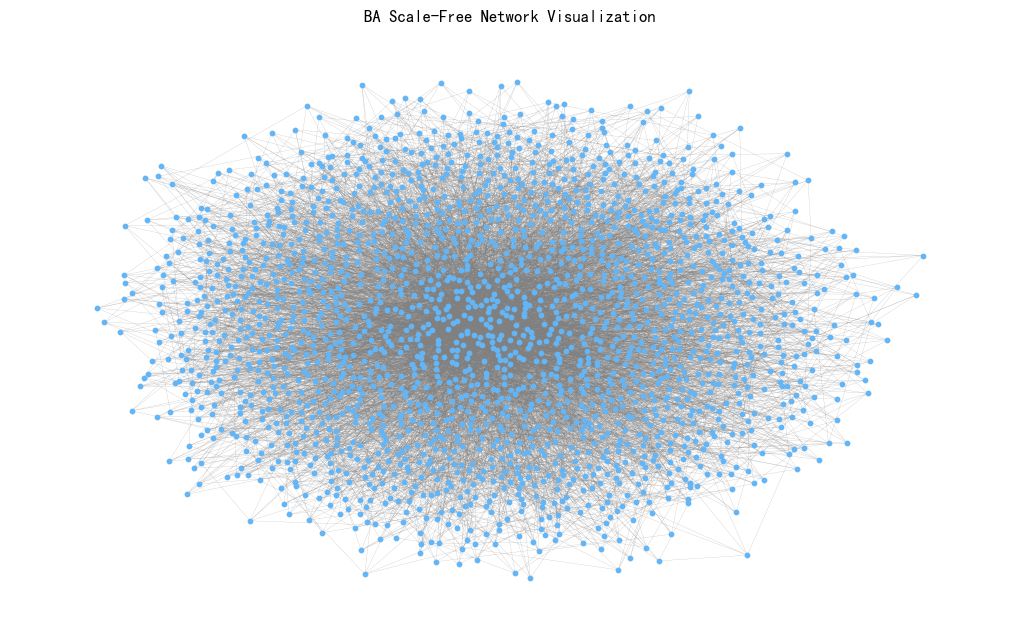

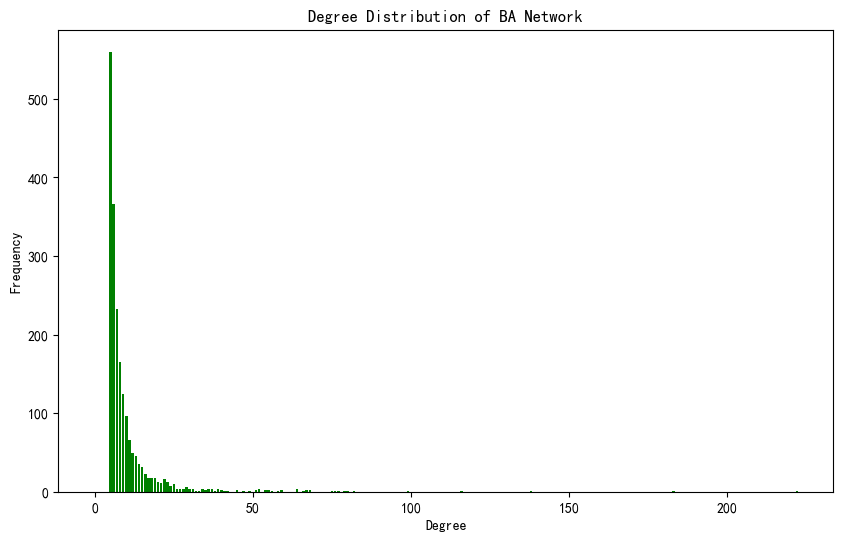

Network Diameter: 5
Average Clustering Coefficient: 0.0249


In [49]:
# -------------------------------------------------
# 设定无标度网络的参数
n = 2000  # 节点数
m = 5    # 每次新增节点连接的边数
# -------------------------------------------------

ba_graph = nx.barabasi_albert_graph(n, m)

# 可视化BA网络
plt.figure(figsize=(10, 6))
# 调整布局参数，让节点分布更均匀
pos = nx.spring_layout(ba_graph, seed=42, k=0.15, iterations=200) 

# 绘制网络
nx.draw(
    ba_graph, pos,
    with_labels=False,
    node_size=10,          # 增大节点大小
    node_color='#64B5F6',  # 更鲜明的节点颜色（浅蓝色）
    edge_color='gray',
    width=0.1              # 调整边的粗细
)

plt.title("BA Scale-Free Network Visualization")
plt.show()

# 分析度分布
degree_sequence = [d for n, d in ba_graph.degree()]
degree_counts = np.bincount(degree_sequence)
degree_values = np.arange(len(degree_counts))

plt.figure(figsize=(10, 6))
plt.bar(degree_values, degree_counts, color='green')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of BA Network")
plt.show()

# 计算网络直径
try:
    diameter = nx.diameter(ba_graph)
    print(f"Network Diameter: {diameter}")
except nx.NetworkXError:
    print("Network is not connected, diameter cannot be calculated.")

# 计算平均集聚系数
clustering_coeff = nx.average_clustering(ba_graph)
print(f"Average Clustering Coefficient: {clustering_coeff:.4f}")

C:\Users\孟洁源\AppData\Local\Temp\ipykernel_23648\2461854843.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(degree_values), np.log(degree_counts), color='green')


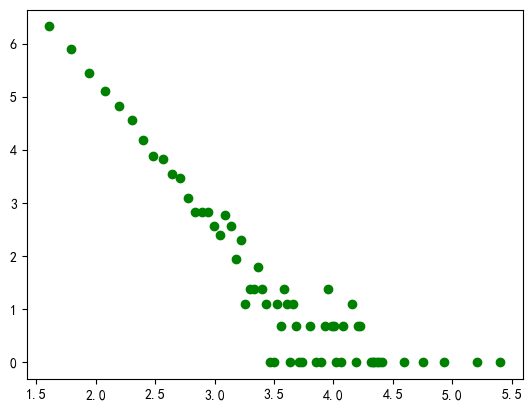

In [76]:
# 绘制其对数分布图
plt.scatter(np.log(degree_values), np.log(degree_counts), color='green')
plt.show()

## 【三】机制对比分析

### 1. 仅含生长机制（不含偏好连接）的网络度分布分析  
- **目的**：剥离BA模型中的“偏好连接”机制，单独研究“生长机制”（持续新增节点并随机连接）对网络的影响。  
- **分析内容**：若仅保留生长机制（新节点随机连接现有节点），网络度分布通常不会呈现幂律特性，可能趋近均匀分布或指数分布。此举凸显“偏好连接”是BA网络形成无标度（幂律度分布）的核心机制。  

Text(0, 0.5, 'Frequency')

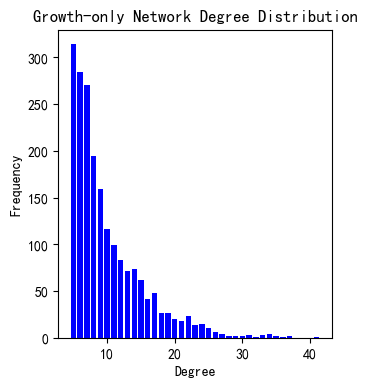

In [52]:
from collections import Counter

# -------------------------------------------------
# 生成仅生长机制网络
n_growth = 2000
m_growth = 5
# -------------------------------------------------


# 1. 仅含生长机制（不含偏好连接）的网络生成与分析
def generate_growth_only_network(n, m):
    G = nx.Graph()
    # 初始化m个节点
    G.add_nodes_from(range(m))
    for new_node in range(m, n):
        # 随机选择m个已有节点连接（无偏好）
        targets = np.random.choice(list(G.nodes()), m, replace=False)
        G.add_edges_from([(new_node, target) for target in targets])
    return G

growth_G = generate_growth_only_network(n_growth, m_growth)
degree_growth = dict(growth_G.degree()).values()
count_growth = Counter(degree_growth)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(count_growth.keys(), count_growth.values(), color='blue')
plt.title("Growth-only Network Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

* 没有大度节点（枢纽节点）
* 低度节点的频率小于BA无标度网络

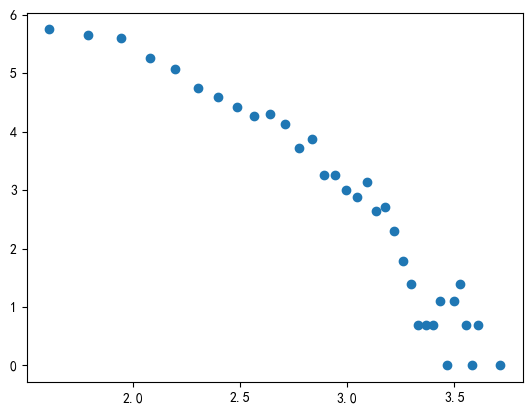

In [59]:
# 对数频数可视化
plt.scatter(np.log(list(count_growth.keys())), np.log(list(count_growth.values())))
plt.show()

### 2. 非线性偏好连接网络特性探究（亚线性 - 线性 - 超线性）  
- **分析逻辑**：研究偏好连接的数学形式（线性、亚线性、超线性）如何影响网络结构。  
  - **线性偏好**：如BA模型，连接概率与节点度数成正比（$P(k_i) \propto k_i$），生成典型幂律度分布。  
  - **亚线性偏好**：连接概率增长慢于度数（如$P(k_i) \propto k_i^\alpha, 0<\alpha<1$），弱化无标度特性，度分布幂律指数变大，网络更均匀。  
  - **超线性偏好**：连接概率增长快于度数（如$P(k_i) \propto k_i^\alpha, \alpha>1$），强化少数枢纽节点，度分布幂律指数变小，网络异质性更高。  

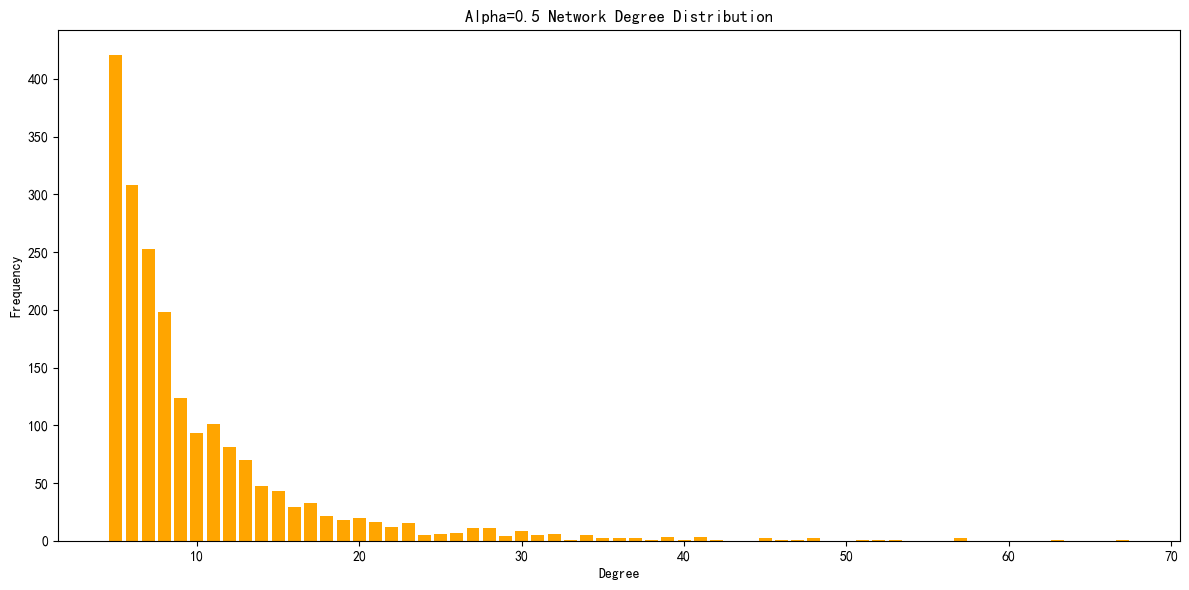

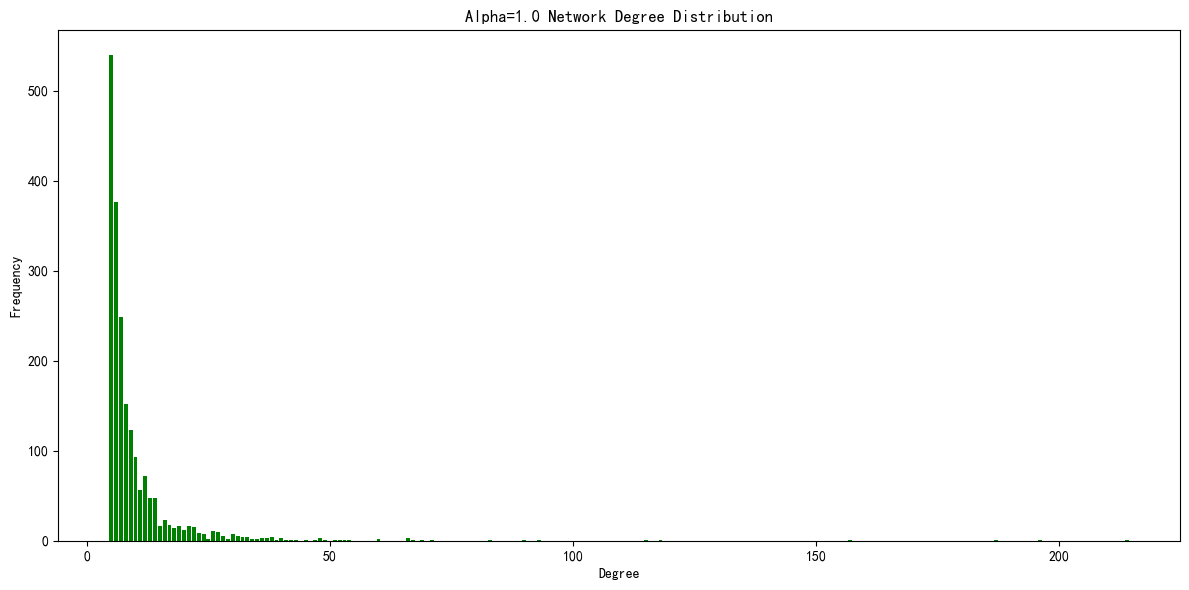

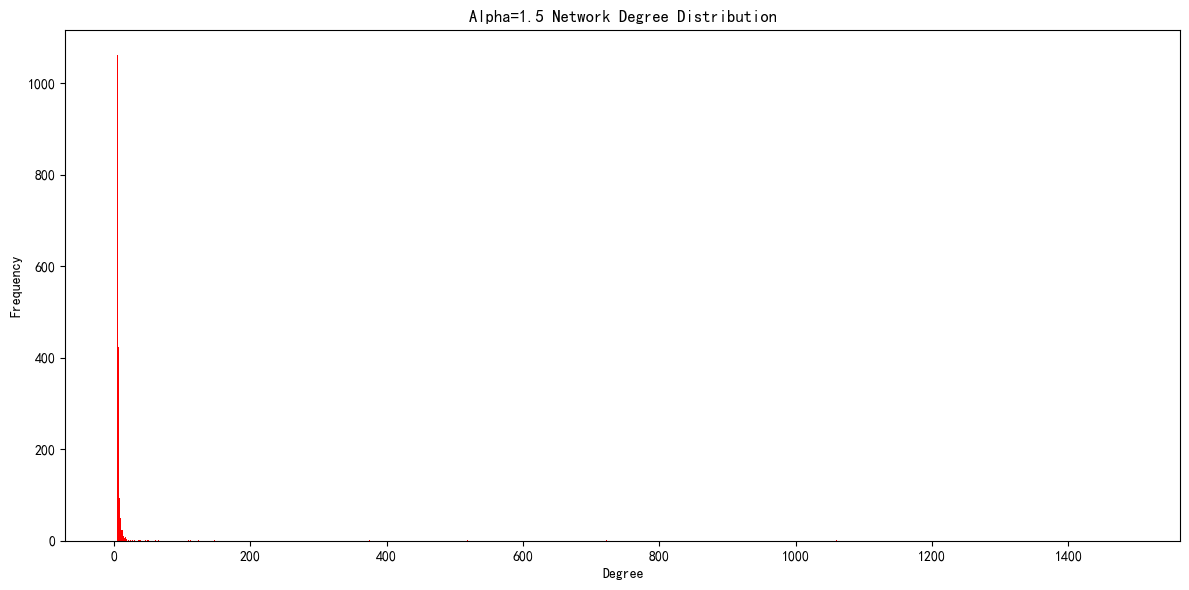

In [71]:
# 2. 非线性偏好连接网络（亚线性、线性、超线性）

# -------------------------------------------------
# 生成不同 alpha 的网络
n_growth = 2000
m_growth = 5
# -------------------------------------------------

def generate_nonlinear_preference_network(n, m, alpha=1.0):
    G = nx.barabasi_albert_graph(m + 1, m)
    for new_node in range(m, n):
        degrees = np.array([d for _, d in G.degree()])
        # 计算概率
        probs = degrees ** alpha
        # 处理可能出现的 NaN 或 inf
        probs = np.nan_to_num(probs, nan=0.0, posinf=1e10, neginf=-1e10)
        # 处理 probs.sum() 为零的情况
        if probs.sum() == 0:
            probs = np.ones_like(probs)
        probs /= probs.sum()
        targets = np.random.choice(list(G.nodes()), m, p=probs, replace=False)
        G.add_edges_from([(new_node, target) for target in targets])
    return G


alphas = [0.5, 1.0, 1.5]
for idx, alpha in enumerate(alphas):
    nl_G = generate_nonlinear_preference_network(n_growth, m_growth, alpha)
    degree_nl = dict(nl_G.degree()).values()
    count_nl = Counter(degree_nl)

    # 创建新的图形窗口
    plt.figure(figsize=(12, 6))
    plt.bar(count_nl.keys(), count_nl.values(), color=['orange', 'green', 'red'][idx])
    plt.title(f"Alpha={alpha} Network Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

将上面的度分布图转化为对数度分布图

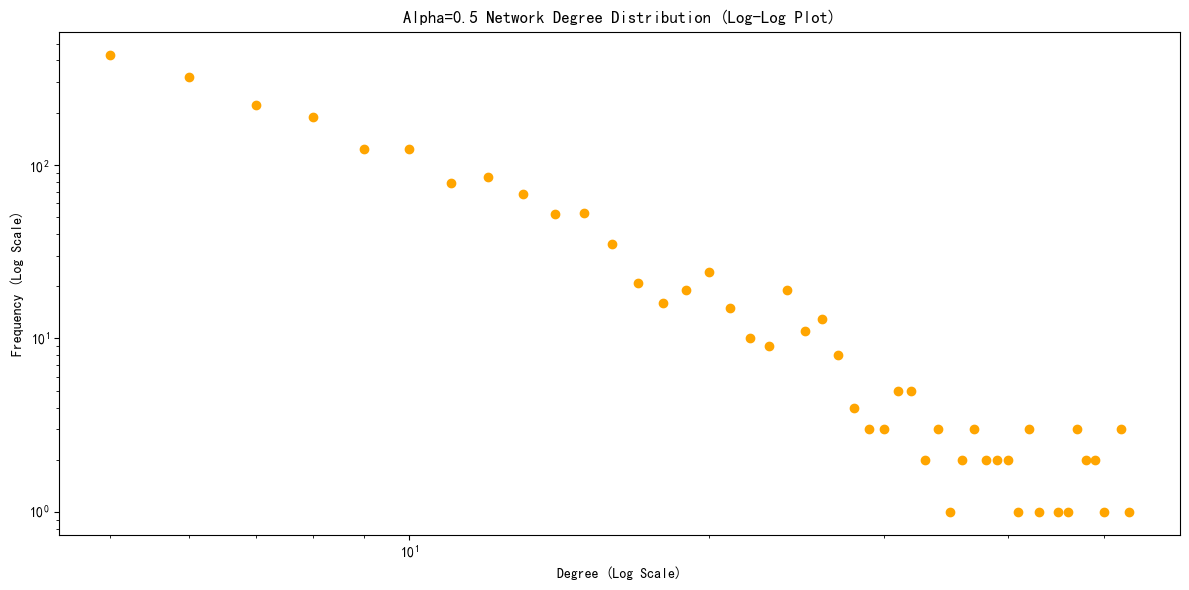

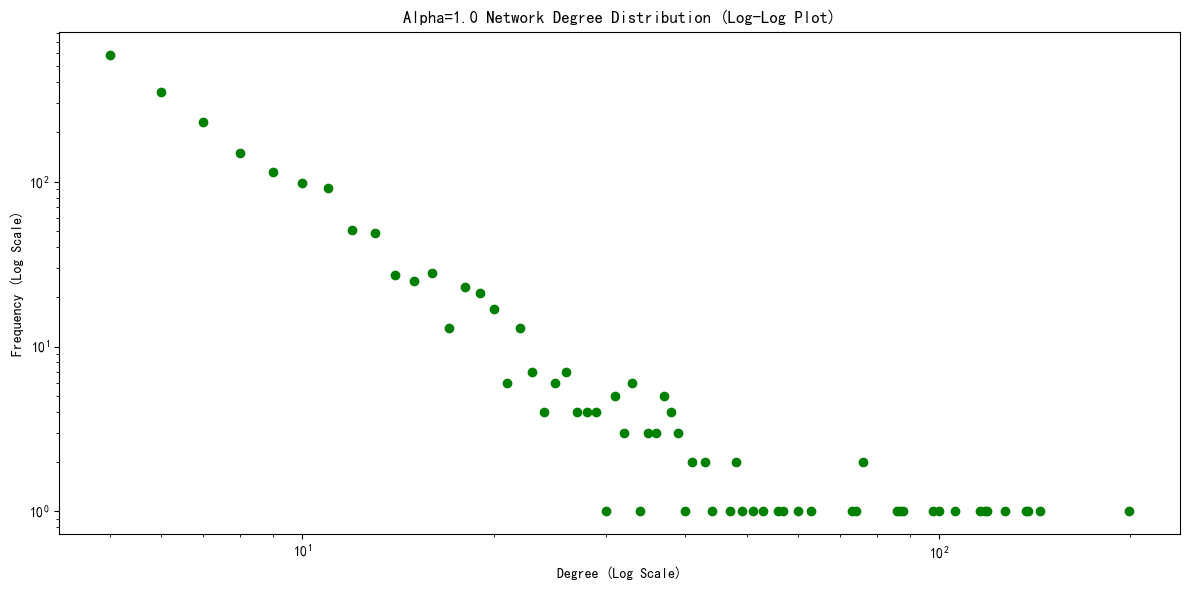

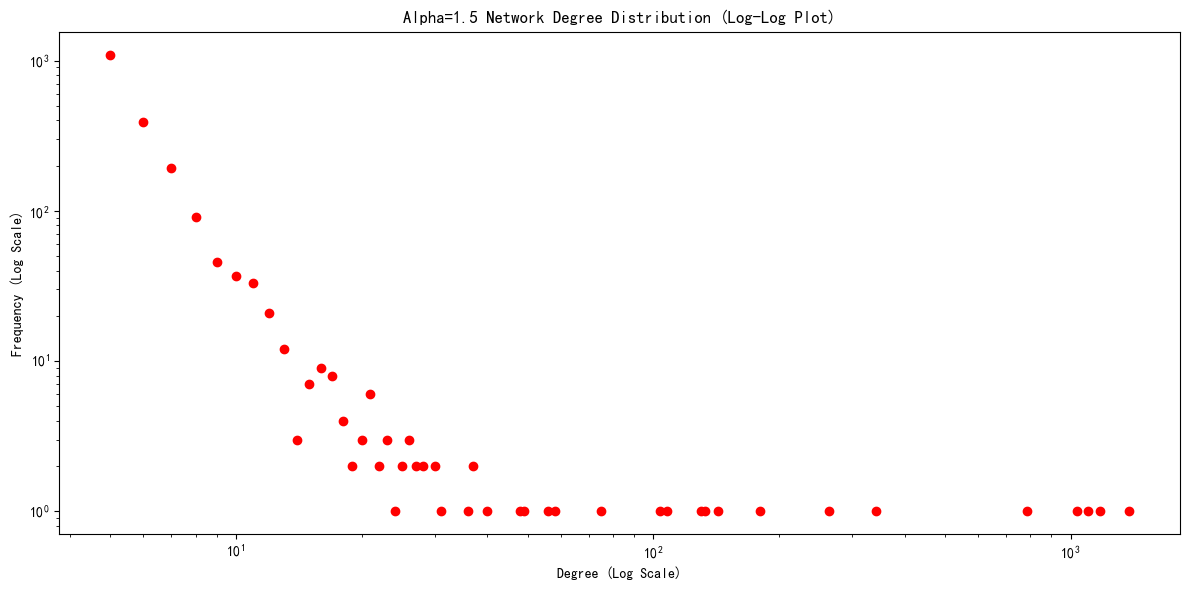

In [74]:
for idx, alpha in enumerate(alphas):
    nl_G = generate_nonlinear_preference_network(n_growth, m_growth, alpha)
    degree_nl = dict(nl_G.degree()).values()
    count_nl = Counter(degree_nl)
    # 绘制对数度分布柱状图
    plt.figure(figsize=(12, 6))
    plt.scatter(count_nl.keys(), count_nl.values(), color=['orange', 'green', 'red'][idx])
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Alpha={alpha} Network Degree Distribution (Log-Log Plot)")
    plt.xlabel("Degree (Log Scale)")
    plt.ylabel("Frequency (Log Scale)")
    plt.tight_layout()
    plt.show()

- 偏好越高，会出现更高的大度节点，两级分化程度会更大